# Fake News Detection

![image.png](attachment:image.png)

## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string

## Importing Dataset

In [ ]:
df_fake = pd.read_csv("Fake.csv")
df_true = pd.read_csv("True.csv")

In [ ]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
df_true.head(5)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


## Inserting a column "class" as target feature

In [ ]:
df_fake["class"] = 0
df_true["class"] = 1

In [ ]:
df_fake.shape, df_true.shape

((23481, 5), (21417, 5))

In [ ]:
# Removing last 10 rows for manual testing
df_fake_manual_testing = df_fake.tail(10)
for i in range(23480,23470,-1):
    df_fake.drop([i], axis = 0, inplace = True)


df_true_manual_testing = df_true.tail(10)
for i in range(21416,21406,-1):
    df_true.drop([i], axis = 0, inplace = True)

In [ ]:
df_fake.shape, df_true.shape

((23471, 5), (21407, 5))

In [ ]:
df_fake_manual_testing["class"] = 0
df_true_manual_testing["class"] = 1

<ipython-input-11-3aaf8ec2aad1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fake_manual_testing["class"] = 0
<ipython-input-11-3aaf8ec2aad1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_true_manual_testing["class"] = 1


In [ ]:
df_fake_manual_testing.head(10)

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [ ]:
df_true_manual_testing.head(10)

,title,text,subject,date,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


In [ ]:
df_manual_testing = pd.concat([df_fake_manual_testing,df_true_manual_testing], axis = 0)
df_manual_testing.to_csv("manual_testing.csv")

## Merging True and Fake Dataframes

In [ ]:
df_merge = pd.concat([df_fake, df_true], axis =0 )
df_merge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [ ]:
df_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

## Removing columns which are not required

In [ ]:
df = df_merge.drop(["title", "subject","date"], axis = 1)

In [ ]:
df.isnull().sum()

,0
text,0
class,0


## Random Shuffling the dataframe

In [ ]:
df = df.sample(frac = 1)

In [ ]:
df.head()

,text,class
9927,NEW YORK (Reuters) - Republican front-runner D...,1
16856,They knew! Can you believe these people? FOX N...,0
13680,Paul Ryan has had almost 8 years to lead the c...,0
990,Watching the healthcare bill he staked his ent...,0
19961,Steven Crowder knocks it out of the park with ...,0


In [ ]:
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)

In [ ]:
df.columns

Index(['text', 'class'], dtype='object')

In [ ]:
df.head()

,text,class
0,NEW YORK (Reuters) - Republican front-runner D...,1
1,They knew! Can you believe these people? FOX N...,0
2,Paul Ryan has had almost 8 years to lead the c...,0
3,Watching the healthcare bill he staked his ent...,0
4,Steven Crowder knocks it out of the park with ...,0


## Creating a function to process the texts

In [ ]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [ ]:
df["text"] = df["text"].apply(wordopt)

## Defining dependent and independent variables

In [ ]:
x = df["text"]
y = df["class"]

## Splitting Training and Testing

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

## Convert text to vectors

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [ ]:
pred_lr=LR.predict(xv_test)

In [ ]:
LR.score(xv_test, y_test)

0.9846702317290552

In [ ]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      5902
           1       0.98      0.99      0.98      5318

    accuracy                           0.98     11220
   macro avg       0.98      0.98      0.98     11220
weighted avg       0.98      0.98      0.98     11220



# **Time complexity of Logistic regression:**

In [ ]:
import time
start_time = time.time()
LR.fit(xv_train, y_train)
training_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
pred_lr = LR.predict(xv_test)
prediction_time = time.time() - start_time

print(f"Training Time: {training_time:.6f} seconds")
print(f"Prediction Time: {prediction_time:.6f} seconds")


Training Time: 5.640158 seconds
Prediction Time: 0.017743 seconds


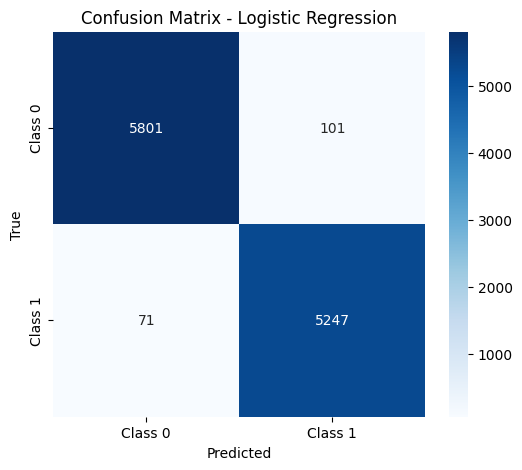

In [ ]:
# Compute confusion matrix
cm_lr = confusion_matrix(y_test, pred_lr)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Decision Tree Classification

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [ ]:
pred_dt = DT.predict(xv_test)

In [ ]:
DT.score(xv_test, y_test)

0.9947415329768271

In [ ]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      5902
           1       0.99      0.99      0.99      5318

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



# **Time complexity of Decision trees**

In [ ]:
import time
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier
DT = DecisionTreeClassifier()

# Measure training time
start_time = time.time()
DT.fit(xv_train, y_train)
training_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
pred_dt = DT.predict(xv_test)
prediction_time = time.time() - start_time

print(f"Training Time: {training_time:.6f} seconds")
print(f"Prediction Time: {prediction_time:.6f} seconds")


Training Time: 41.682949 seconds
Prediction Time: 0.017679 seconds


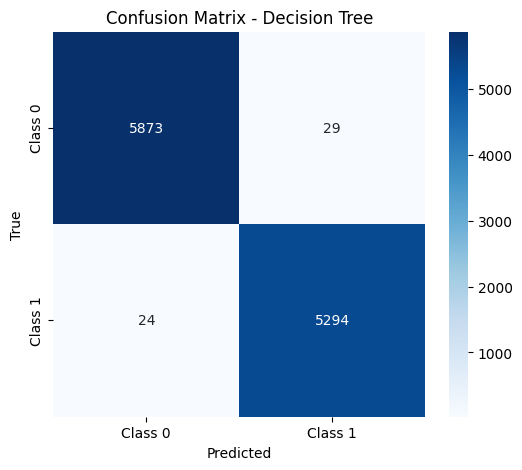

In [ ]:
# Compute confusion matrix
cm_dt = confusion_matrix(y_test, pred_dt)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(xv_train, y_train)

GradientBoostingClassifier(random_state=0)

In [ ]:
pred_gbc = GBC.predict(xv_test)

In [ ]:
GBC.score(xv_test, y_test)

0.9950089126559715

In [ ]:
print(classification_report(y_test, pred_gbc))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5902
           1       0.99      1.00      0.99      5318

    accuracy                           1.00     11220
   macro avg       0.99      1.00      0.99     11220
weighted avg       1.00      1.00      1.00     11220



# **Time complexity of Gradient Boosting classifier**

In [ ]:
import time
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting Classifier
GBC = GradientBoostingClassifier(random_state=0)

# Measure training time
start_time = time.time()
GBC.fit(xv_train, y_train)
training_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
pred_gbc = GBC.predict(xv_test)
prediction_time = time.time() - start_time

print(f"Training Time: {training_time:.6f} seconds")
print(f"Prediction Time: {prediction_time:.6f} seconds")


Training Time: 309.438084 seconds
Prediction Time: 0.040059 seconds


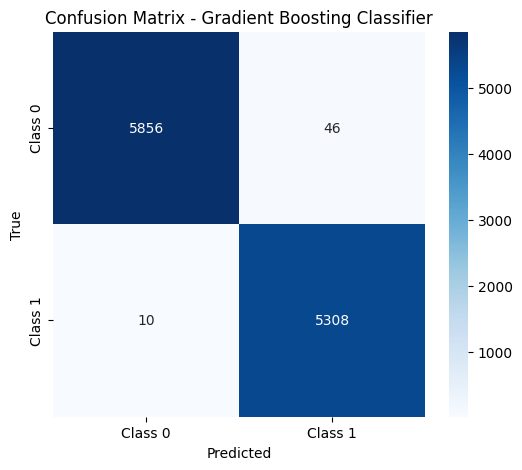

In [ ]:
# Compute confusion matrix
cm_gbc = confusion_matrix(y_test, pred_gbc)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_gbc, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix - Gradient Boosting Classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
pred_rfc = RFC.predict(xv_test)

In [ ]:
RFC.score(xv_test, y_test)

0.9863636363636363

In [ ]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5902
           1       0.99      0.99      0.99      5318

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



## **Time complexity of Random forest**

In [ ]:
import time
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
RFC = RandomForestClassifier(random_state=0)

# Measure training time
start_time = time.time()
RFC.fit(xv_train, y_train)
training_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
pred_rfc = RFC.predict(xv_test)
prediction_time = time.time() - start_time

print(f"Training Time: {training_time:.6f} seconds")
print(f"Prediction Time: {prediction_time:.6f} seconds")


Training Time: 70.397564 seconds
Prediction Time: 1.079823 seconds


Vizualisation

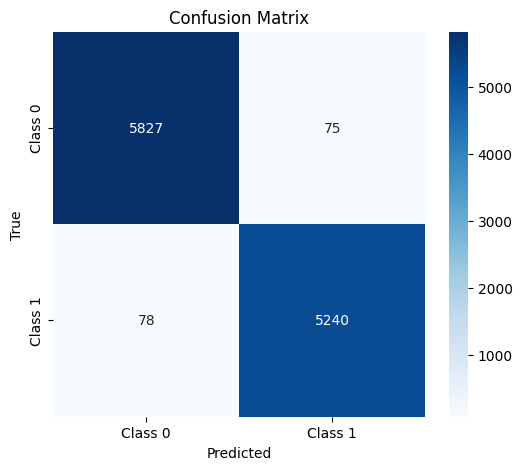

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
cm = confusion_matrix(y_test, pred_rfc)

# Plot heatmap of confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


## Model Testing

In [ ]:
def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"

def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt)
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_GBC = GBC.predict(new_xv_test)
    pred_RFC = RFC.predict(new_xv_test)

    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction: {}".format(output_lable(pred_LR[0]),                                                                                                       output_lable(pred_DT[0]),
                                                                                                              output_lable(pred_GBC[0]),
                                                                                                              output_lable(pred_RFC[0])))

In [ ]:
news = str(input())
manual_testing(news)

hello


LR Prediction: Fake News 
DT Prediction: Fake News 
GBC Prediction: Fake News 
RFC Prediction: Fake News


In [ ]:
news = str(input())
manual_testing(news)

hy


LR Prediction: Fake News 
DT Prediction: Fake News 
GBC Prediction: Fake News 
RFC Prediction: Fake News


In [ ]:
news = str(input())
manual_testing(news)

hy


LR Prediction: Fake News 
DT Prediction: Fake News 
GBC Prediction: Fake News 
RFC Prediction: Fake News


# **Comparison across models used for Fake news detection**

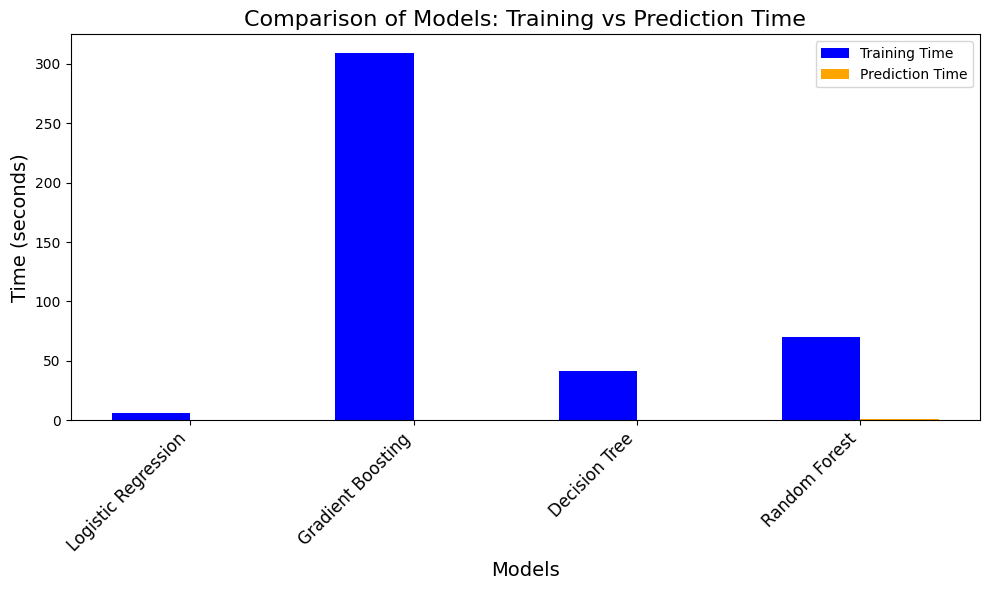

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['Logistic Regression', 'Gradient Boosting', 'Decision Tree', 'Random Forest']

# Training times (in seconds) for each model
train_times = [5.640158, 309.438084, 41.682949, 70.397564]

# Prediction times (in seconds) for each model
predict_times = [0.017743, 0.040059, 0.017679, 1.079823]

# Number of models
n_models = len(models)

# X positions for the bars
ind = np.arange(n_models)

# Bar width
width = 0.35

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the training times
bar1 = ax.bar(ind - width/2, train_times, width, label='Training Time', color='blue')

# Plotting the prediction times
bar2 = ax.bar(ind + width/2, predict_times, width, label='Prediction Time', color='orange')

# Adding titles and labels
ax.set_xlabel('Models', fontsize=14)
ax.set_ylabel('Time (seconds)', fontsize=14)
ax.set_title('Comparison of Models: Training vs Prediction Time', fontsize=16)
ax.set_xticks(ind)
ax.set_xticklabels(models, rotation=45, ha='right', fontsize=12)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


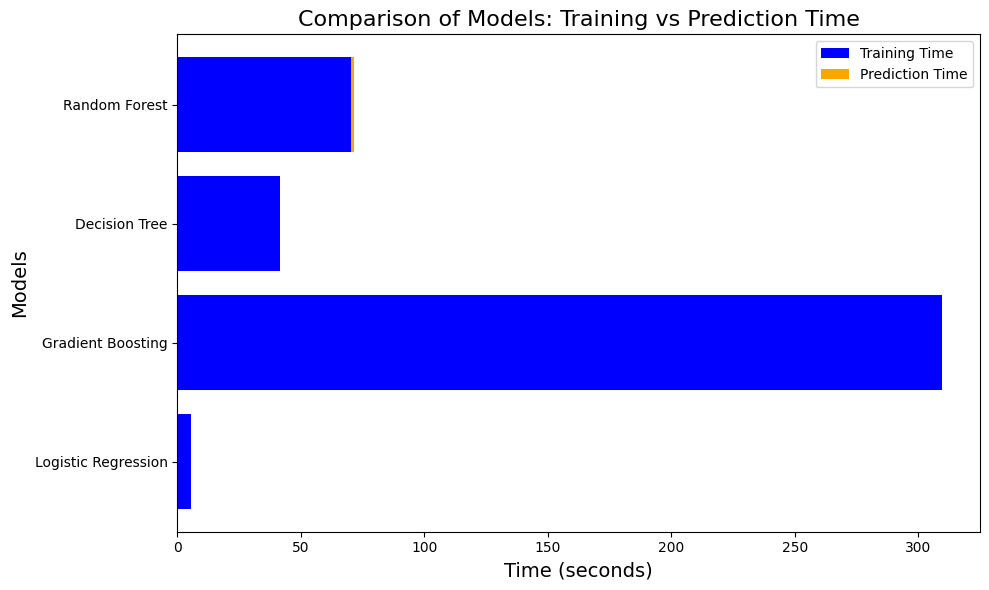

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['Logistic Regression', 'Gradient Boosting', 'Decision Tree', 'Random Forest']

# Training times (in seconds) for each model
train_times = [5.640158, 309.438084, 41.682949, 70.397564]

# Prediction times (in seconds) for each model
predict_times = [0.017743, 0.040059, 0.017679, 1.079823]

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the training times as horizontal bars
ax.barh(models, train_times, color='blue', label='Training Time')

# Plotting the prediction times as horizontal bars
ax.barh(models, predict_times, color='orange', left=train_times, label='Prediction Time')

# Adding titles and labels
ax.set_xlabel('Time (seconds)', fontsize=14)
ax.set_ylabel('Models', fontsize=14)
ax.set_title('Comparison of Models: Training vs Prediction Time', fontsize=16)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


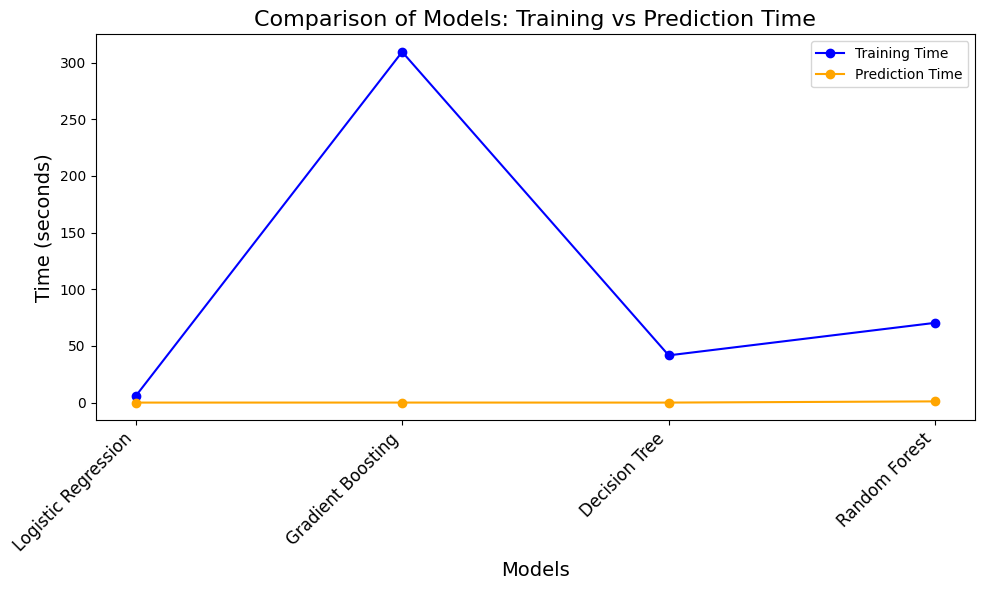

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['Logistic Regression', 'Gradient Boosting', 'Decision Tree', 'Random Forest']

# Training times (in seconds) for each model
train_times = [5.640158, 309.438084, 41.682949, 70.397564]

# Prediction times (in seconds) for each model
predict_times = [0.017743, 0.040059, 0.017679, 1.079823]

# X positions for each model
ind = np.arange(len(models))

# Create the plot
plt.figure(figsize=(10, 6))

# Plotting the training times as a line plot
plt.plot(models, train_times, label='Training Time', marker='o', color='blue')

# Plotting the prediction times as a line plot
plt.plot(models, predict_times, label='Prediction Time', marker='o', color='orange')

# Adding titles and labels
plt.xlabel('Models', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('Comparison of Models: Training vs Prediction Time', fontsize=16)
plt.legend()

# Show the plot
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()
